In [ ]:
# # install Plotly
# !pip3 install plotly

### Importing Libraries 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing import sequence


import numpy as np
import os
import pandas as pd


import plotly.express as px
import plotly.graph_objs as go


import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, recall_score, average_precision_score

from sklearn.model_selection import train_test_split

import tensorflow as tf

### Data Pre Processing

In [ ]:
ConditionGroupFileNames = os.listdir('drive/MyDrive/FML/Depression-prediction-from-actigraph-main/data/condition')
ControlGroupFileNames = os.listdir('drive/MyDrive/FML/Depression-prediction-from-actigraph-main/data/control')

In [ ]:
X = []
y = []
for fileName in ConditionGroupFileNames:
    df = pd.read_csv('drive/MyDrive/FML/Depression-prediction-from-actigraph-main/data/condition/'+str(fileName))
#     print(df)
    dates = df['date'].unique()
#     print(dates)
    activityLevelsPerDay = []
    for date in dates:
        if len(df[df['date']==date]) == 1440:
            temp = pd.DataFrame(df[df['date']==date]).drop(columns=['timestamp','date'])
            activityLevelsPerDay.append(temp)
    for dailyActivityLevel in activityLevelsPerDay:
        activityVector = np.array(dailyActivityLevel["activity"])
        if len(activityVector) == 1440:
            X.append(activityVector)
            y.append(1)

In [ ]:
for fileName in ControlGroupFileNames:
    df = pd.read_csv('drive/MyDrive/FML/Depression-prediction-from-actigraph-main/data/control/'+str(fileName))
    dates = df['date'].unique()
    activityLevelsPerDay = []
    for date in dates:
        if len(df[df['date']==date]) == 1440:
            temp = pd.DataFrame(df[df['date']==date]).drop(columns=['timestamp','date'])
            activityLevelsPerDay.append(temp)
    for dailyActivityLevel in activityLevelsPerDay:
        activityVector = np.array(dailyActivityLevel["activity"])
        if len(activityVector) == 1440:
            X.append(activityVector)
            y.append(0)

In [ ]:
X = np.array(X)
y= np.array(y)

In [ ]:
# Non Depressed Class and Depressed Class
sum(y==0), sum(y==1)

(670, 359)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [ ]:
seq_len = 1440

In [ ]:
model = Sequential()
model.add(LSTM(256, input_shape=( 1,seq_len), return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128))  
model.add(Dense(1, activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 256)            1737728   
                                                                 
 lstm_1 (LSTM)               (None, 1, 256)            525312    
                                                                 
 lstm_2 (LSTM)               (None, 1, 256)            525312    
                                                                 
 lstm_3 (LSTM)               (None, 1, 256)            525312    
                                                                 
 lstm_4 (LSTM)               (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 3,510,913
Trainable params: 3,510,913
Non-

In [ ]:
adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
history = model.fit(X_train.reshape(-1, 1, 1440), y_train, epochs=50, batch_size=128, validation_data=(X_val.reshape(-1, 1, 1440),y_val))

Epoch 1/50
8/8 [==============================] - 16s 427ms/step - loss: 1.7445 - accuracy: 0.6523 - val_loss: 1.0855 - val_accuracy: 0.6408
Epoch 2/50
8/8 [==============================] - 1s 87ms/step - loss: 0.8604 - accuracy: 0.6523 - val_loss: 0.7021 - val_accuracy: 0.6408
Epoch 3/50
8/8 [==============================] - 1s 80ms/step - loss: 0.6177 - accuracy: 0.6361 - val_loss: 0.7241 - val_accuracy: 0.6214
Epoch 4/50
8/8 [==============================] - 1s 82ms/step - loss: 0.5875 - accuracy: 0.6674 - val_loss: 0.7332 - val_accuracy: 0.6214
Epoch 5/50
8/8 [==============================] - 1s 170ms/step - loss: 0.5744 - accuracy: 0.6566 - val_loss: 0.8118 - val_accuracy: 0.6505
Epoch 6/50
8/8 [==============================] - 1s 82ms/step - loss: 0.5639 - accuracy: 0.6652 - val_loss: 0.8279 - val_accuracy: 0.6505
Epoch 7/50
8/8 [==============================] - 1s 83ms/step - loss: 0.5580 - accuracy: 0.6868 - val_loss: 0.8057 - val_accuracy: 0.6408
Epoch 8/50
8/8 [========

In [ ]:
# Accuracy Graph 
fig = go.Figure()
fig.add_trace(go.Scatter(y= history.history["accuracy"], 
                    mode='lines',
                    name='lines'))

fig.update_layout(
    template="simple_white",
    xaxis_title="Epochs",
    yaxis_title="Val Accuracy",

title={
    'text': "Val Accuracy",
    'y':0.9,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'})

fig.show()

In [ ]:
# Loss Graph 
fig = go.Figure()
fig.add_trace(go.Scatter(y= history.history["loss"], 
                    mode='lines',
                    name='lines'))

fig.update_layout(
    template="simple_white",
    xaxis_title="Epochs",
    yaxis_title="Val Loss",

title={
    'text': "Val Loss",
    'y':0.9,
    'x':0.5,
    'xanchor': 'center',
    'yanchor': 'top'})

fig.show()

In [ ]:
# Prediction
test_preds = model.predict(X_test.reshape(-1, 1, 1440))

7/7 [==============================] - 0s 34ms/step


In [ ]:
# accuracy
accuracy_score(y_test, np.rint(test_preds))

0.7184466019417476

In [ ]:
recall_score(y_test, np.rint(test_preds), average='micro')

0.7184466019417476

In [ ]:
precision_score(y_test, np.rint(test_preds), average='micro')

0.7184466019417476

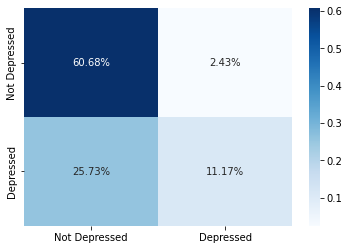

In [ ]:
cf_matrix = confusion_matrix(y_test, np.rint(test_preds))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues',  xticklabels=["Not Depressed", "Depressed"], yticklabels=["Not Depressed", "Depressed"])